
 
# Udacity Project Investigate a Dataset : TMDB 5000 Movie
#### Abdulmohsen Ali Albareed 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project will analysis the TMDB 5000 Movie dataset to practice what I lerned in  this section about dealing with data for e.g gathering and cleaning and visualing. TMDB 5000 Movie dataset contains 5000 movies that extracted from TMDB https://www.themoviedb.org from Kaggle. I asked some questions about this dataset to find their answers via analysis and visualization. How many movies are released over the years?,What is the Avg. of revenue for each genres?, Who are the Top 3 Movies(based on vote)?,What type of genres are fovrite to people?,What are the movie genres that are most popular with people?.All of these questions we will answer in the last part of this analysis. Enojy we this journey! 



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



### Data Cleaning


In [4]:
#drop the columns that we don't need in our analysis like : homepage,id,keywords,overview,tagline.
df.drop(['homepage','keywords','overview','tagline'], axis=1,inplace=True)
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


> As we see in columns genres,production_companies,production_countries,spoken_languages the data stored as json foramt,So we will wrtie functions to covert it to string format 

In [5]:
#json_to_str method need one argumnet (the json data from columns) 
def json_to_str(json_data):
    data=json.loads(json_data)
    #write each value in tag 'name' in list called names
    names = [d['name'] for d in data]
    return names

In [6]:
# write_str method to write the new value that came from json_to_str in df 
def write_str(col):
    for i in range(len(df)):
        names = json_to_str(df.loc[i, col])
        names_str = ','.join(names)
        df.loc[i, col] = names_str

In [7]:
#Now here we will use write_str in this following columns (genres,production_companies,production_countries,spoken_languages) 
#to convert the data from json format to string foramt
write_str('genres')
write_str('production_companies')
write_str('production_countries')
write_str('spoken_languages')

In [8]:
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,Spectre,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,The Dark Knight Rises,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",49529,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,John Carter,6.1,2124


>Now our functions we wrote doing well! like in first row in genres we convert the data from this ( [{"id": 28, "name": "Action"}, {"id": 12, "nam..) to this ( Action,Adventure,Fantasy,Science Fiction) . and so on on another columns we mentined previously.

In [9]:
df.dtypes

budget                    int64
genres                   object
id                        int64
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [10]:
df.dropna(subset=['release_date'],inplace=True)

In [11]:
df['release_date'].isnull().value_counts()

False    4802
Name: release_date, dtype: int64

In [12]:
release_date=np.array(df['release_date'],dtype='datetime64[Y]')

In [13]:
release_date

array(['2009', '2007', '2015', ..., '2013', '2012', '2005'],
      dtype='datetime64[Y]')

In [14]:
type(release_date[0])

numpy.datetime64

In [15]:
df['release_date']=release_date

In [16]:
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-01-01,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,Spectre,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-01-01,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,The Dark Knight Rises,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-01-01,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",49529,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-01-01,284139100,132.0,English,Released,John Carter,6.1,2124


> Here we converted the dtype of release_date from string to datetime64 in yeras and subset the years only from all records to help us in the analysis process.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4802 non-null   int64         
 1   genres                4802 non-null   object        
 2   id                    4802 non-null   int64         
 3   original_language     4802 non-null   object        
 4   original_title        4802 non-null   object        
 5   popularity            4802 non-null   float64       
 6   production_companies  4802 non-null   object        
 7   production_countries  4802 non-null   object        
 8   release_date          4802 non-null   datetime64[ns]
 9   revenue               4802 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  spoken_languages      4802 non-null   object        
 12  status                4802 non-null   object        
 13  title             

In [18]:
df.query('revenue ==0')

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
83,27000000,"Action,Adventure,Science Fiction,Romance",79698,en,The Lovers,2.418535,"Corsan,Bliss Media,Limelight International Med...","Australia,Belgium,India",2015-01-01,0,109.0,English,Released,The Lovers,4.8,34
135,150000000,"Drama,Horror,Thriller",7978,en,The Wolfman,21.214571,"Universal Pictures,Stuber Productions,Relativi...",United States of America,2010-01-01,0,102.0,English,Released,The Wolfman,5.5,549
265,0,"Comedy,Fantasy,Family",10588,en,The Cat in the Hat,18.251129,"Imagine Entertainment,DreamWorks SKG,Universal...",United States of America,2003-01-01,0,82.0,English,Released,The Cat in the Hat,4.9,366
309,84000000,"Fantasy,Comedy,Family,Adventure",10214,en,Son of the Mask,17.815595,"New Line Cinema,Pathé Distribution","Germany,United States of America",2005-01-01,0,94.0,English,Released,Son of the Mask,3.6,338
376,90000000,"Science Fiction,Action,Drama,Thriller",10357,en,Volcano,19.836124,Twentieth Century Fox Film Corporation,United States of America,1997-01-01,0,104.0,"Deutsch,Español,English",Released,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"Foreign,Thriller",67238,en,Cavite,0.022173,,,2005-01-01,0,80.0,,Released,Cavite,7.5,2
4799,9000,"Comedy,Romance",72766,en,Newlyweds,0.642552,,,2011-01-01,0,85.0,,Released,Newlyweds,5.9,5
4800,0,"Comedy,Drama,Romance,TV Movie",231617,en,"Signed, Sealed, Delivered",1.444476,"Front Street Pictures,Muse Entertainment Enter...",United States of America,2013-01-01,0,120.0,English,Released,"Signed, Sealed, Delivered",7.0,6
4801,0,,126186,en,Shanghai Calling,0.857008,,"United States of America,China",2012-01-01,0,98.0,English,Released,Shanghai Calling,5.7,7


In [19]:
df.query('production_countries == ""') 

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
272,90000000,"Comedy,Romance",24113,en,Town & Country,1.004579,New Line Cinema,,2001-01-01,10372291,104.0,English,Released,Town & Country,3.7,16
1011,0,Horror,53953,de,The Tooth Fairy,0.716764,,,2006-01-01,0,0.0,"English,Polski",Released,The Tooth Fairy,4.3,13
1360,0,Drama,45054,en,There Be Dragons,6.668679,,,2011-01-01,0,112.0,English,Released,There Be Dragons,5.9,27
1511,0,"Drama,Family",12920,en,Dreamer: Inspired By a True Story,6.048743,"DreamWorks SKG,Hyde Park Entertainment",,2005-01-01,0,106.0,English,Released,Dreamer: Inspired By a True Story,6.3,67
1898,26000000,"Comedy,Family",18147,en,Unaccompanied Minors,10.006282,,,2006-01-01,0,90.0,English,Released,Unaccompanied Minors,5.4,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,0,"Thriller,Crime,Drama",366967,en,Dutch Kills,0.038143,,,2015-01-01,0,90.0,,Released,Dutch Kills,0.0,0
4784,0,"Drama,Comedy,Romance",24055,en,The Puffy Chair,1.243955,,,2005-01-01,0,85.0,,Released,The Puffy Chair,6.2,15
4787,0,"Science Fiction,Thriller",86304,en,All Superheroes Must Die,3.545991,Grindfest,,2011-01-01,0,78.0,English,Released,All Superheroes Must Die,4.2,13
4797,0,"Foreign,Thriller",67238,en,Cavite,0.022173,,,2005-01-01,0,80.0,,Released,Cavite,7.5,2


In [20]:
df[df.genres=='']

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
3971,0,,191229,en,Iguana,0.214704,,,1988-01-01,0,88.0,"English,Español",Released,Iguana,6.0,1
3992,0,,346081,en,Sardaarji,0.296981,,India,2015-01-01,0,0.0,,Released,Sardaarji,9.5,2
4068,0,,371085,en,Sharkskin,0.027801,,,2015-01-01,0,0.0,,Released,Sharkskin,0.0,0
4105,2000000,,48382,en,"The Book of Mormon Movie, Volume 1: The Journey",0.031947,,,2003-01-01,1672730,120.0,,Released,"The Book of Mormon Movie, Volume 1: The Journey",5.0,2
4118,0,,325140,en,Hum To Mohabbat Karega,0.001186,,,2000-01-01,0,0.0,,Released,Hum To Mohabbat Karega,0.0,0
4293,1,,357834,en,The Algerian,0.025364,Zelko Films,"Algeria,United States of America",2015-01-01,0,99.0,,Released,The Algerian,0.0,0
4314,1200000,,137955,en,Crowsnest,0.057564,,Canada,2012-01-01,0,84.0,,Released,Crowsnest,4.8,12
4385,0,,206412,en,Lisa Picard Is Famous,0.690089,,,2000-01-01,0,90.0,,Released,Lisa Picard Is Famous,4.0,1
4400,0,,219716,en,Sparkler,0.547654,,,1999-01-01,0,96.0,,Released,Sparkler,0.0,1
4413,0,,335874,en,Childless,0.243853,,United States of America,2015-01-01,0,90.0,English,Released,Childless,4.5,2


In [21]:
df[df.vote_average==0]

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
1464,0,"Drama,Crime",310706,en,Black Water Transit,0.126738,Capitol Films,United States of America,2009-01-01,0,100.0,English,Released,Black Water Transit,0.0,0
3669,0,"Comedy,Drama",113406,en,Should've Been Romeo,0.407030,Phillybrook Films,United States of America,2012-01-01,0,0.0,English,Released,Should've Been Romeo,0.0,0
3670,0,Family,447027,en,Running Forever,0.028756,New Kingdom Pictures,United States of America,2015-01-01,0,88.0,,Released,Running Forever,0.0,0
3852,0,Drama,395766,en,The Secret,0.042346,,,2016-01-01,0,200.0,,Released,The Secret,0.0,0
3855,3500000,Documentary,370662,en,Time to Choose,1.618138,Representational Pictures,United States of America,2015-01-01,0,100.0,English,Released,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"Action,Western",69382,en,The Legend of God's Gun,0.003582,,,2007-01-01,0,78.0,,Released,The Legend of God's Gun,0.0,0
4771,0,Horror,220490,en,Her Cry: La Llorona Investigation,0.056459,,,2013-01-01,0,89.0,,Released,Her Cry: La Llorona Investigation,0.0,0
4780,0,"Thriller,Crime,Drama",366967,en,Dutch Kills,0.038143,,,2015-01-01,0,90.0,,Released,Dutch Kills,0.0,0
4785,0,Drama,287625,en,Stories of Our Lives,0.327794,,Kenya,2014-01-01,0,60.0,"Kiswahili,English",Released,Stories of Our Lives,0.0,0


In [22]:
df[df.popularity==0]

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count


In [23]:
df = df[df['genres'] != '']
df = df[df['production_countries'] != '']

In [24]:
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-01-01,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,Spectre,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-01-01,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,The Dark Knight Rises,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-01-01,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",49529,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-01-01,284139100,132.0,English,Released,John Carter,6.1,2124


In [25]:
#checking for any duplication in id column
df.id.duplicated().value_counts()

False    4622
Name: id, dtype: int64

In [26]:
#sperate the genres in each movie in indevdual row
df = df.assign(genres=df['genres'].str.split(',')).explode('genres')

In [27]:
#just checking 
df.query('genres == "Adventure"')

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Adventure,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-01-01,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Adventure,206647,en,Spectre,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-01-01,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466
4,260000000,Adventure,49529,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-01-01,284139100,132.0,English,Released,John Carter,6.1,2124
5,258000000,Adventure,559,en,Spider-Man 3,115.699814,"Columbia Pictures,Laura Ziskin Productions,Mar...",United States of America,2007-01-01,890871626,139.0,"English,Français",Released,Spider-Man 3,5.9,3576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,0,Adventure,4107,en,Bloody Sunday,7.330691,"Portman Entertainment Group,Bórd Scannán na hÉ...","Ireland,United Kingdom",2002-01-01,773228,107.0,"English,Gaeilge",Released,Bloody Sunday,7.2,53
4579,400000,Adventure,762,en,Monty Python and the Holy Grail,64.782984,"Python (Monty) Pictures Limited,Michael White ...",United Kingdom,1975-01-01,5028948,91.0,"Français,Latin,English",Released,Monty Python and the Holy Grail,7.8,1708
4599,0,Adventure,25678,en,American Ninja 2: The Confrontation,5.061107,"Cannon Group,Golan-Globus",United States of America,1987-01-01,0,90.0,English,Released,American Ninja 2: The Confrontation,4.9,49
4669,210000,Adventure,35073,en,"The Beast from 20,000 Fathoms",2.043661,Jack Dietz Productions,United States of America,1953-01-01,5000000,80.0,"English,Français",Released,"The Beast from 20,000 Fathoms",6.7,41


In [28]:
df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
0,237000000,Adventure,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
0,237000000,Fantasy,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
0,237000000,Science Fiction,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-01-01,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500


In [29]:
df.revenue.median()

27674124.0

In [30]:
#fill the zero row in revenue column with the median of revenue
df['revenue'] = df.revenue.replace(0,df.revenue.median())

In [31]:
df.query('revenue == 0')

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count


In [32]:
df.vote_average.median()

6.2

In [33]:
#fill the zero row in vote_average column with the median of vote_average
df['vote_average'] = df.vote_average.replace(0,df.vote_average.median())

In [34]:
df.query('vote_average == 0')

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count


> We checked for all null values in the columns that we needed in our analysis. By nulls, we mean the rows that contain zero or just empty string or space,After that, we drop all the records that contain nulls,We will make .

<a id='eda'></a>
## Exploratory Data Analysis




### How many movies are released over the years?

In [35]:
#function to use it in drawing the bar chart 
def bar_draw(content,title,xlabel,ylabel):
    ax=content.plot(kind='barh',title=title,figsize=(8,8))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)              

In [36]:
#create a dataframe with no duplicate records to use in some of the questions to answer
df_distinct = df.drop_duplicates(subset=['id'])

In [37]:
df_distinct

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,en,Avatar,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-01-01,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-01-01,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,en,Spectre,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-01-01,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466
3,250000000,Action,49026,en,The Dark Knight Rises,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-01-01,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-01-01,284139100,132.0,English,Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,Drama,124606,en,Bang,0.918116,"Asylum Films,FM Entertainment,Eagle Eye Films ...",United States of America,1995-01-01,27674124,98.0,English,Released,Bang,6.0,1
4796,7000,Science Fiction,14337,en,Primer,23.307949,Thinkfilm,United States of America,2004-01-01,424760,77.0,English,Released,Primer,6.9,658
4798,220000,Action,9367,es,El Mariachi,14.269792,Columbia Pictures,"Mexico,United States of America",1992-01-01,2040920,81.0,Español,Released,El Mariachi,6.6,238
4800,0,Comedy,231617,en,"Signed, Sealed, Delivered",1.444476,"Front Street Pictures,Muse Entertainment Enter...",United States of America,2013-01-01,27674124,120.0,English,Released,"Signed, Sealed, Delivered",7.0,6


In [38]:
df_distinct.release_date.value_counts()

2009-01-01    235
2006-01-01    225
2014-01-01    225
2008-01-01    223
2013-01-01    219
             ... 
1935-01-01      1
1927-01-01      1
1958-01-01      1
1941-01-01      1
1916-01-01      1
Name: release_date, Length: 89, dtype: int64

In [39]:
movies_released_years= df_distinct.release_date.value_counts()

In [40]:
movies_released_years.to_csv('movies_released_years.csv')

In [41]:
movies_released_years_moving_avg=pd.read_csv('movies_released_years_mov_avg.csv')

In [42]:
movies_released_years_moving_avg

,years,release_date,mov_avg_5y
0,1916-01-01,1,1.2
1,1925-01-01,1,1.2
2,1927-01-01,1,1.4
3,1929-01-01,2,1.4
4,1930-01-01,1,1.2
...,...,...,...
84,2012-01-01,198,188.4
85,2013-01-01,219,215.6
86,2014-01-01,225,213.6
87,2015-01-01,202,211.2


In [43]:
movies_released_years_moving_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   years         89 non-null     object 
 1   release_date  89 non-null     int64  
 2   mov_avg_5y    89 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [44]:
movies_released=np.array(movies_released_years_moving_avg['years'],dtype='datetime64[Y]')

In [45]:
movies_released

array(['1916', '1925', '1927', '1929', '1930', '1932', '1933', '1934',
       '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942',
       '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype='datetime64[Y]')

In [46]:
movies_released_years_moving_avg['years']=movies_released

In [47]:
movies_released_years_moving_avg

,years,release_date,mov_avg_5y
0,1916-01-01,1,1.2
1,1925-01-01,1,1.2
2,1927-01-01,1,1.4
3,1929-01-01,2,1.4
4,1930-01-01,1,1.2
...,...,...,...
84,2012-01-01,198,188.4
85,2013-01-01,219,215.6
86,2014-01-01,225,213.6
87,2015-01-01,202,211.2


Text(0.5, 1.0, 'No. of movies are released over the years')

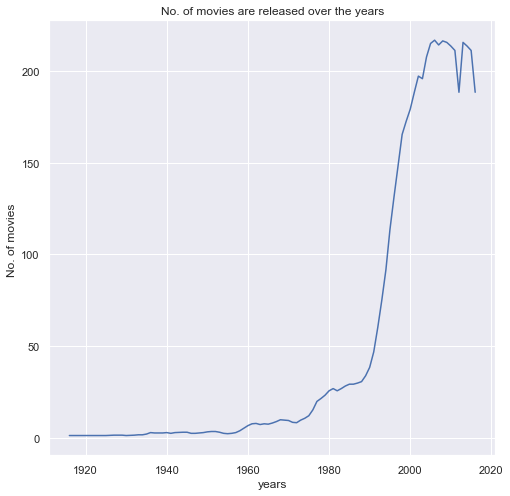

In [48]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(8,8)})
ax=sns.lineplot(data=movies_released_years_moving_avg, x="years", y="mov_avg_5y")
ax.set_ylabel('No. of movies ')
ax.set_title('No. of movies are released over the years')


### What is the Top 10 Avg. of revenue for genres?

In [49]:
Avg_revenue=df.groupby('genres').revenue.mean()

In [50]:
Avg_revenue=Avg_revenue.nlargest(10)

In [51]:
Avg_revenue

genres
Animation          2.327372e+08
Adventure          2.146744e+08
Fantasy            1.997943e+08
Family             1.729577e+08
Science Fiction    1.591840e+08
Action             1.484071e+08
Thriller           8.896538e+07
War                8.880841e+07
Mystery            8.549353e+07
Comedy             8.191825e+07
Name: revenue, dtype: float64

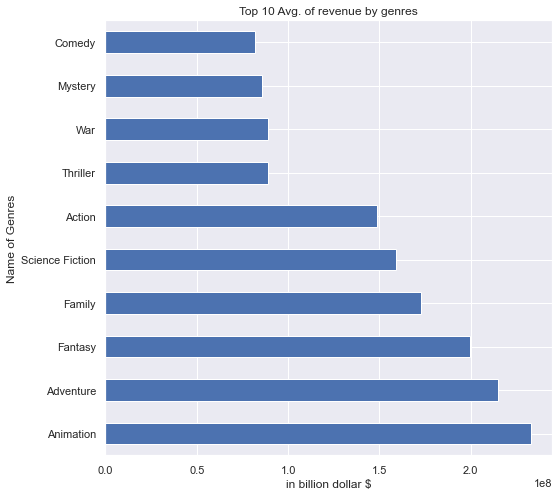

In [52]:
bar_draw(Avg_revenue,"Top 10 Avg. of revenue by genres",'in billion dollar $','Name of Genres')

### Who are the Top 3 Movies(based on vote)?

> As we know, the vote rate depends on two things: how many people vote and what they rate. In this dataset, we can't say Dancer, Texas Pop. 81 is the best movie based on vote average. If you see how many votes there? There is only one person rating the movie! So if we compare this movie with The Shawshank Redemption, which got an 8.5 rating average with 8205 voters, is The Dancer, Texas Pop. 81 better than The Shawshank Redemption because it has a 10 rating average with one voter? that guide me to use the Bayesian average formula to find the Rate_weight to find the fear rate rather than how many voters there are and what is the rating average?

In [53]:
df_distinct.query('original_title == "Dancer, Texas Pop. 81"')[['original_title','vote_average','vote_count']]

,original_title,vote_average,vote_count
4045,"Dancer, Texas Pop. 81",10.0,1


In [54]:
df_distinct.query('original_title == "The Shawshank Redemption"')[['original_title','vote_average','vote_count']]

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205


In [55]:
#constant value for minimum number of votes required
m = df_distinct['vote_count'].mean()
#overall average rating across all movies in the dataset
C = df_distinct['vote_average'].mean()

In [56]:
def bayesian_rating(row):
    v = row['vote_count']
    R = row['vote_average']
    return (v / (v + m)) * R + (m / (v + m)) * C

In [ ]:
df_distinct.loc[:, 'Rate_weight'] = df_distinct.apply(bayesian_rating, axis=1)

In [58]:
df_distinct = df_distinct.sort_values('Rate_weight', ascending=False)

In [59]:
df_distinct.head(3)[['original_title','Rate_weight']]

,original_title,Rate_weight
1881,The Shawshank Redemption,8.314760
3337,The Godfather,8.160813
662,Fight Club,8.151004


### What are the Most countries producies more movies?

In [60]:
df_distinct_cont = df_distinct.assign(production_countries=df_distinct['production_countries'].str.split(',')).explode('production_countries')

In [61]:
df_distinct_cont

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Rate_weight
1881,25000000,Drama,278,en,The Shawshank Redemption,136.747729,Castle Rock Entertainment,United States of America,1994-01-01,28341469,142.0,English,Released,The Shawshank Redemption,8.5,8205,8.314760
3337,6000000,Drama,238,en,The Godfather,143.659698,"Paramount Pictures,Alfran Productions",United States of America,1972-01-01,245066411,175.0,"English,Italiano,Latin",Released,The Godfather,8.4,5893,8.160813
662,63000000,Drama,550,en,Fight Club,146.757391,"Regency Enterprises,Fox 2000 Pictures,Taurus F...",Germany,1999-01-01,100853753,139.0,English,Released,Fight Club,8.3,9413,8.151004
662,63000000,Drama,550,en,Fight Club,146.757391,"Regency Enterprises,Fox 2000 Pictures,Taurus F...",United States of America,1999-01-01,100853753,139.0,English,Released,Fight Club,8.3,9413,8.151004
3232,8000000,Thriller,680,en,Pulp Fiction,121.463076,"Miramax Films,A Band Apart,Jersey Films",United States of America,1994-01-01,213928762,154.0,"English,Español,Français",Released,Pulp Fiction,8.3,8428,8.134956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,4000000,Thriller,241251,en,The Boy Next Door,24.161735,"Universal Pictures,Nuyorican Productions,Blumh...",United States of America,2015-01-01,52425855,91.0,English,Released,The Boy Next Door,4.1,1022,4.963564
1652,100000000,Action,14164,en,Dragonball Evolution,21.677732,"Ingenious Film Partners,Twentieth Century Fox ...",United States of America,2009-01-01,27674124,85.0,"English,日本語,हिन्दी",Released,Dragonball Evolution,2.9,462,4.903504
210,125000000,Action,415,en,Batman & Robin,50.073575,"PolyGram Filmed Entertainment,Warner Bros.",United Kingdom,1997-01-01,238207122,125.0,English,Released,Batman & Robin,4.2,1418,4.869802
210,125000000,Action,415,en,Batman & Robin,50.073575,"PolyGram Filmed Entertainment,Warner Bros.",United States of America,1997-01-01,238207122,125.0,English,Released,Batman & Robin,4.2,1418,4.869802


In [62]:
Most_countries_prod=df_distinct_cont.production_countries.value_counts()

In [63]:
Most_countries_prod=Most_countries_prod.nlargest(10)

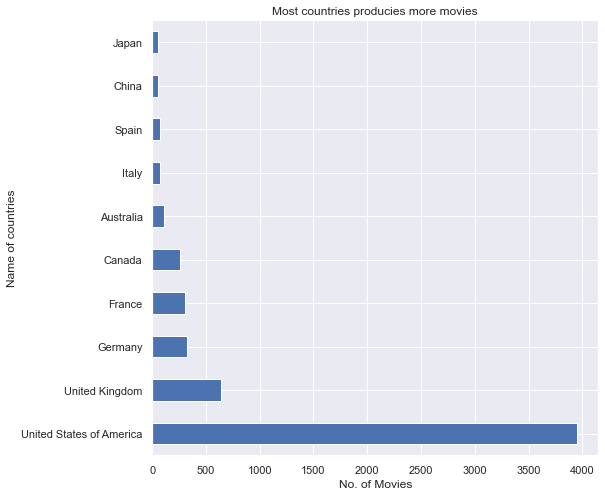

In [64]:
bar_draw(Most_countries_prod,'Most countries producies more movies','No. of Movies','Name of countries')

### What are the movie genres that are most popular with people?


In [65]:
df.genres.value_counts()

Drama              2214
Comedy             1668
Thriller           1253
Action             1135
Romance             868
Adventure           782
Crime               688
Science Fiction     528
Family              501
Horror              500
Fantasy             420
Mystery             343
Animation           232
History             196
Music               182
War                 143
Documentary          91
Western              81
Foreign              26
TV Movie              8
Name: genres, dtype: int64

In [66]:
most_genres_popular=df.groupby('genres').popularity.mean()

In [67]:
most_genres_popular=most_genres_popular.nlargest(10)

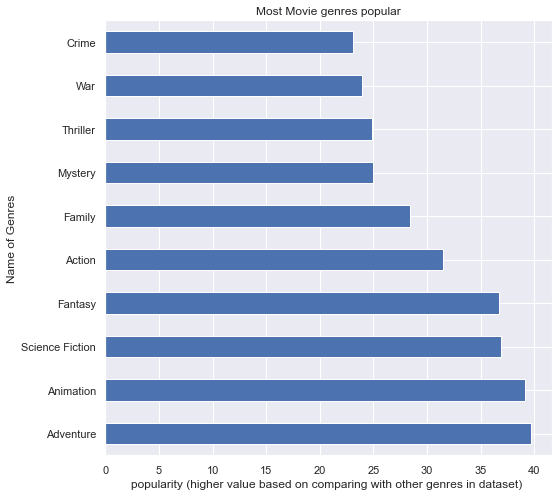

In [68]:
bar_draw(most_genres_popular,'Most Movie genres popular','popularity (higher value based on comparing with other genres in dataset) ','Name of Genres')

<a id='conclusions'></a>
## Conclusions

>Finally After all of the analysis, we can now answer the questions we asked in the introduction section. But before we start answering questions, let's summarize what we do. First, we gather the dataset 'tmdb_5000_movies.csv' by using read_csv from pandas. Secondly, we cleaned the data by deleting the columns that we didn't need in our analysis, like homepage, id,keywords,overview,tagline.Also, we have some columns stored in JSON format, like genres,production_companies,production_countries,spoken_languages,So we converted it to string format by using the JSON library. The column released_date was stored as a string, so we converted it to a datetime and dropped the null rows in the columns that we needed for our analysis.

>One of my analysis' limitations is the format in which the data is stored; for example, many columns are stored as JSON dtype, which must be converted to String dtype. Also, the genres in many movies have more than two, which makes the analysis and finding the correct answer more complicated because of the duplication that the genres make when they are combined. One more thing I wish for is data about the viewers, like where they watch the movies or what seasons of the year they watch the movies. I think this will help us find more questions and answers that may help improve the movie industry.

>After cleaning the data Now it's time to share with you my findings on this dataset.


>1.The movies that relesed begin incresce exponletly starting from 1980's.

>2.The movies that categorize as Animation have the biggest average revenue by over two billion dollars.

>3.The United States of America is the country that has produced more than 3500 movies in the dataset over the years.

>4.The most movies genres people like to watch is the Adventure

>5.The Top 3 movies are people like based on vote are (in order) : The Shawshank Redemption	, The Godfather , Fight Club	

## Reference 

> https://stackoverflow.com/

> https://pandas.pydata.org/docs/reference/

> https://seaborn.pydata.org/generated/seaborn.lineplot.html

> https://en.wikipedia.org/wiki/Bayesian_average